In [1]:
import numpy as np
import matplotlib.pyplot as plt

# CHAPTER 10 Codes
## E10.4

In [2]:
def ADALINE_learning(input_Vectors, targets, alpha, initial_weights, initial_bias, verbose = True, epochs = -1):
    """
    ADALINE learning method 
    note that in this network purelin transfer function (a.k.a activation function) is used

    INPUTS:
    ---------
    input_Vectors:  numpy matrixes of inputs, each column is an input vector, meaning the inputs to the network
    targets:  numpy array of targets, each target must be a scalar
    alpha:  learning rate, must be a number between zero and one
    initial_weights:  network weights
    initial_bias:  network initial bias
    verbose:  boolean variable, Enable learning logs or not
    epochs:  how many iteration the network should iterate, default is -1 meaning it should be trained until convergence

    OUTPUTS:
    ---------
    bias:  the bias that the network learned
    weight: the weights that the network learned
    Error:  each iteration (epoch) error is saved into a numpy array
    """
    
    ## save errors to return each epoch error to the user
    Errors = []

    assert alpha > 0 and alpha <= 1, "Error, learning rate must be between 0 and 1"

    ## how many input vectors we have
    inputs_count = input_Vectors.shape[1]

    ## set the weights and bias to initial weights and bias
    weights = np.copy(initial_weights)
    bias = np.copy(initial_bias)

    ## if the epochs wasn't set, train the network until convergence
    ## else set the convergence to False
    if epochs == -1:
        convergence = True
    else: 
        convergence = False

    ## if epochs was set the convergence would be false but the (iter < epochs) will be true
    ## else the convergence would be true
    iter = 0
    while (iter < epochs) or (convergence):
        input_vector_number = iter % inputs_count
        
        ## check the actual output
        a = weights.dot(input_Vectors[:, input_vector_number])
        ## check the error        
        error = targets[input_vector_number] - a
        
        Errors.append(error)
        
        ## update weights
        updated_weights = weights + 2 * alpha * error * input_Vectors[:, input_vector_number].T
        updated_bias = bias + 2 * alpha * error
        
        if verbose:
            print(f'Actual output, iter: {iter:d}, input_vector: {input_vector_number: d}\n' ,a )
            print("old weights: \n", weights, "\nupdated weights: ", updated_weights)
            print("old bias: \n", updated_bias, "\nupdated bias: ", updated_bias)

        ## save for the next iteration
        weights = updated_weights
        bias = updated_bias
        iter += 1

    print("\n\nFinished")
    print("Updated last weight\n", weights)
    print("Updated last bias\n", bias)
    
    return bias, weights, np.array(Errors).flatten()
    

In [3]:
input_vectors = np.matrix('1 -1; 1 -1')
targets = np.array([1, -1])
## initialize weight and biases as zero
weights = np.matrix('0 0')
bias = 0

learning_rate = 0.3

new_bias, new_weights, error = ADALINE_learning(input_vectors, 
                                        targets,
                                        learning_rate,
                                        weights, 
                                        bias, 
                                        verbose=True,
                                        epochs=40)

Actual output, iter: 0, input_vector:  0
 [[0]]
old weights: 
 [[0 0]] 
updated weights:  [[0.6 0.6]]
old bias: 
 [[0.6]] 
updated bias:  [[0.6]]
Actual output, iter: 1, input_vector:  1
 [[-1.2]]
old weights: 
 [[0.6 0.6]] 
updated weights:  [[0.48 0.48]]
old bias: 
 [[0.72]] 
updated bias:  [[0.72]]
Actual output, iter: 2, input_vector:  0
 [[0.96]]
old weights: 
 [[0.48 0.48]] 
updated weights:  [[0.504 0.504]]
old bias: 
 [[0.744]] 
updated bias:  [[0.744]]
Actual output, iter: 3, input_vector:  1
 [[-1.008]]
old weights: 
 [[0.504 0.504]] 
updated weights:  [[0.4992 0.4992]]
old bias: 
 [[0.7488]] 
updated bias:  [[0.7488]]
Actual output, iter: 4, input_vector:  0
 [[0.9984]]
old weights: 
 [[0.4992 0.4992]] 
updated weights:  [[0.50016 0.50016]]
old bias: 
 [[0.74976]] 
updated bias:  [[0.74976]]
Actual output, iter: 5, input_vector:  1
 [[-1.00032]]
old weights: 
 [[0.50016 0.50016]] 
updated weights:  [[0.499968 0.499968]]
old bias: 
 [[0.749952]] 
updated bias:  [[0.749952]]
A

In [4]:
## See the error rate
def plot_error(error, text_x ,text_y):
    plt.plot(error)
    plt.xlabel('epoch')
    plt.ylabel('error')

    ## plot a ```y = 0``` line
    plt.plot(np.linspace(0, 40, 200), np.linspace(0, 0, 200))
    plt.text(text_x, text_y, "the orange line is the zero error")
    plt.show()



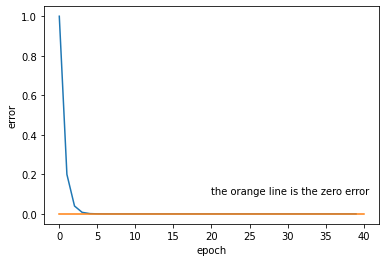

In [5]:
plot_error(error, 20, 0.1)

In [6]:
input_vectors = np.matrix('1 -1; 1 -1')
targets = np.array([1, -1])
## initialize weight and biases as zero
weights = np.matrix('1 1')
bias = 1

learning_rate = 0.3

new_bias_1, new_weights_1, error = ADALINE_learning(input_vectors, 
                                        targets,
                                        learning_rate,
                                        weights, 
                                        bias, 
                                        verbose=True,
                                        epochs=40)

Actual output, iter: 0, input_vector:  0
 [[2]]
old weights: 
 [[1 1]] 
updated weights:  [[0.4 0.4]]
old bias: 
 [[0.4]] 
updated bias:  [[0.4]]
Actual output, iter: 1, input_vector:  1
 [[-0.8]]
old weights: 
 [[0.4 0.4]] 
updated weights:  [[0.52 0.52]]
old bias: 
 [[0.28]] 
updated bias:  [[0.28]]
Actual output, iter: 2, input_vector:  0
 [[1.04]]
old weights: 
 [[0.52 0.52]] 
updated weights:  [[0.496 0.496]]
old bias: 
 [[0.256]] 
updated bias:  [[0.256]]
Actual output, iter: 3, input_vector:  1
 [[-0.992]]
old weights: 
 [[0.496 0.496]] 
updated weights:  [[0.5008 0.5008]]
old bias: 
 [[0.2512]] 
updated bias:  [[0.2512]]
Actual output, iter: 4, input_vector:  0
 [[1.0016]]
old weights: 
 [[0.5008 0.5008]] 
updated weights:  [[0.49984 0.49984]]
old bias: 
 [[0.25024]] 
updated bias:  [[0.25024]]
Actual output, iter: 5, input_vector:  1
 [[-0.99968]]
old weights: 
 [[0.49984 0.49984]] 
updated weights:  [[0.500032 0.500032]]
old bias: 
 [[0.250048]] 
updated bias:  [[0.250048]]
A

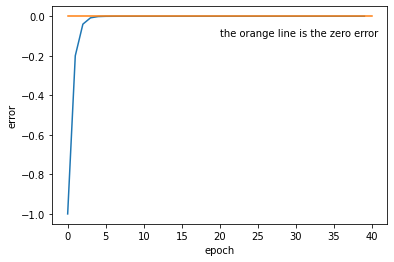

In [7]:
plot_error(error, 20, -0.1)


In [8]:
print("Initial wieghts and biases as zeros")
print("Learned Weights: \n", new_weights)
print("Learned biases: \n", new_bias)

print("\n")
print("Initial wieghts and biases as ones")
print("Learned Weights: \n", new_weights_1)
print("Learned biases: \n", new_bias_1)

Initial wieghts and biases as zeros
Learned Weights: 
 [[0.5 0.5]]
Learned biases: 
 [[0.75]]


Initial wieghts and biases as ones
Learned Weights: 
 [[0.5 0.5]]
Learned biases: 
 [[0.25]]


## E10.14
data for 1 and 2 and 4 in the grids would be like this grids below

### one

<table>
    <tr>
        <td>one</td>
        <td>one</td>
        <td>~</td>
        <td>~</td>
    </tr>
    <tr>
        <td>~</td>
        <td>one</td>
        <td>~</td>
        <td>~</td>
    </tr>
    <tr>
        <td>~</td>
        <td>one</td>
        <td>~</td>
        <td>~</td>
    </tr>
    <tr>
        <td>~</td>
        <td>one</td>
        <td>~</td>
        <td>~</td>
    </tr>
</table>
Second shifted one
<table>
    <tr>
        <td>~</td>
        <td>one</td>
        <td>one</td>
        <td>~</td>
    </tr>
    <tr>
        <td>~</td>
        <td>~</td>
        <td>one</td>
        <td>~</td>
    </tr>
    <tr>
        <td>~</td>
        <td>~</td>
        <td>one</td>
        <td>~</td>
    </tr>
    <tr>
        <td>~</td>
        <td>~</td>
        <td>one</td>
        <td>~</td>
    </tr>
</table>

### two

<table>
    <tr>
        <td>~</td>
        <td>two</td>
        <td>~</td>
        <td>~</td>
    </tr>
    <tr>
        <td>two</td>
        <td>~</td>
        <td>two</td>
        <td>~</td>
    </tr>
    <tr>
        <td>~</td>
        <td>two</td>
        <td>~</td>
        <td>~</td>
    </tr>
    <tr>
        <td>~</td>
        <td>two</td>
        <td>two</td>
        <td>two</td>
    </tr>
</table>
<b>Second shifted two is</b>
<table>
    <tr>
        <td>~</td>
        <td>~</td>
        <td>two</td>
        <td>~</td>
    </tr>
    <tr>
        <td>~</td>
        <td>two</td>
        <td>~</td>
        <td>two</td>
    </tr>
    <tr>
        <td>~</td>
        <td>~</td>
        <td>two</td>
        <td>~</td>
    </tr>
    <tr>
        <td>~</td>
        <td>~</td>
        <td>two</td>
        <td>two</td>
    </tr>
</table>

### four
<table>
    <tr>
        <td>~</td>
        <td>four</td>
        <td>~</td>
        <td>~</td>
    </tr>
    <tr>
        <td>four</td>
        <td>~</td>
        <td>~</td>
        <td>~</td>
    </tr>
    <tr>
        <td>four</td>
        <td>four</td>
        <td>four</td>
        <td>~</td>
    </tr>
    <tr>
        <td>~</td>
        <td>four</td>
        <td>~</td>
        <td>~</td>
    </tr>
</table>
<b>second shifted four is </b>
<table>
    <tr>
        <td>~</td>
        <td>~</td>
        <td>four</td>
        <td>~</td>
    </tr>
    <tr>
        <td>~</td>
        <td>four</td>
        <td>~</td>
        <td>~</td>
    </tr>
    <tr>
        <td>~</td>
        <td>four</td>
        <td>four</td>
        <td>four</td>
    </tr>
    <tr>
        <td>~</td>
        <td>~</td>
        <td>four</td>
        <td>~</td>
    </tr>
</table>

In [9]:
one = np.matrix('1 1 -1 -1 -1 1 -1 -1, -1 1 -1 -1 -1 1 -1 -1').T
one_shifted = np.matrix('-1 1 1 -1 -1 -1 1 -1 -1 -1 1 -1 -1 -1 1 -1').T

two = np.matrix('-1 1 -1 -1 1 -1 1 -1 -1 1 -1 -1 -1 1 1 1').T
two_shifted = np.matrix('-1 -1 1 -1 -1 1 -1 1 -1 -1 1 -1 -1 -1 1 1').T

four = np.matrix('-1 1 -1 -1 1 -1 -1 -1 1 1 1 -1 -1 1 -1 -1').T
four_shifted = np.matrix('-1 -1 1 -1 -1 1 -1 -1 -1 1 1 1 -1 -1 1 -1').T

input_vectors = np.concatenate((one, one_shifted, two, two_shifted, four, four_shifted), axis = -1)

targets = np.array([1, 1, 2, 2, 4, 4])
## initialize weight and biases as zero
weights = np.matrix('0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0')
bias = 1

learning_rate = 0.3

new_bias, new_weights, error = ADALINE_learning(input_vectors, 
                                        targets,
                                        learning_rate,
                                        weights, 
                                        bias, 
                                        verbose=True,
                                        epochs=40)

Actual output, iter: 0, input_vector:  0
 [[0]]
old weights: 
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]] 
updated weights:  [[ 0.6  0.6 -0.6 -0.6 -0.6  0.6 -0.6 -0.6 -0.6  0.6 -0.6 -0.6 -0.6  0.6
  -0.6 -0.6]]
old bias: 
 [[1.6]] 
updated bias:  [[1.6]]
Actual output, iter: 1, input_vector:  1
 [[0.]]
old weights: 
 [[ 0.6  0.6 -0.6 -0.6 -0.6  0.6 -0.6 -0.6 -0.6  0.6 -0.6 -0.6 -0.6  0.6
  -0.6 -0.6]] 
updated weights:  [[ 0.   1.2  0.  -1.2 -1.2  0.   0.  -1.2 -1.2  0.   0.  -1.2 -1.2  0.
   0.  -1.2]]
old bias: 
 [[2.2]] 
updated bias:  [[2.2]]
Actual output, iter: 2, input_vector:  2
 [[4.8]]
old weights: 
 [[ 0.   1.2  0.  -1.2 -1.2  0.   0.  -1.2 -1.2  0.   0.  -1.2 -1.2  0.
   0.  -1.2]] 
updated weights:  [[ 1.68 -0.48  1.68  0.48 -2.88  1.68 -1.68  0.48  0.48 -1.68  1.68  0.48
   0.48 -1.68 -1.68 -2.88]]
old bias: 
 [[0.52]] 
updated bias:  [[0.52]]
Actual output, iter: 3, input_vector:  3
 [[5.76]]
old weights: 
 [[ 1.68 -0.48  1.68  0.48 -2.88  1.68 -1.68  0.48  0.48 -1.68  1.68  0.

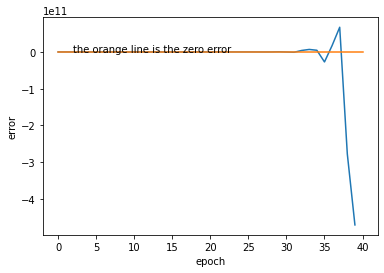

In [10]:
plot_error(error, 2, 10000)